In [1]:
import numpy as np
import nibabel as nib
from util.path import Path
import matplotlib.pyplot as plt

# compute VIFs

In [10]:
from encoding import build_regressors, SPACES
from tqdm import tqdm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
%cd ..

/scratch/gpfs/zzada/fconv


In [ ]:
X, features = build_regressors(105, "model-gpt2-2b_layer-24", spaces=SPACES["joint_nosplit"], split=False)

In [6]:
features

{'task': slice(0, 2, None),
 'word_stats': slice(2, 5, None),
 'spectral': slice(5, 85, None),
 'articulation': slice(85, 107, None),
 'llm': slice(107, 1707, None)}

In [11]:
vif = [variance_inflation_factor(X, i) for i in tqdm(np.arange(X.shape[-1]))]

  0%|          | 0/1707 [00:00<?, ?it/s]/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
  1%|          | 10/1707 [12:38<36:38:28, 77.73s/it]

KeyboardInterrupt: 

# OLD

In [2]:
from scipy.signal import correlate, correlation_lags

In [22]:
x = np.random.randn(128)
y = np.concatenate((np.random.randn(20) , x[0:-20]))
x.shape, y.shape

((128,), (128,))

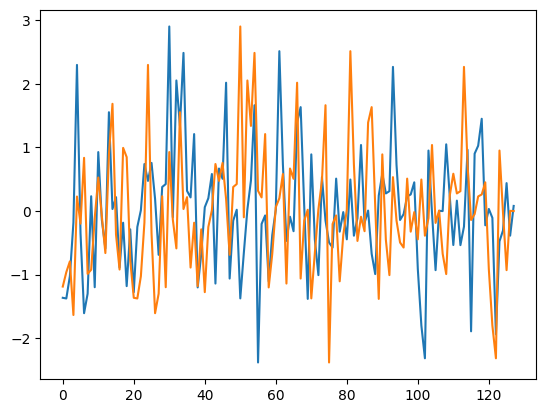

In [23]:
plt.plot(x)
plt.plot(y)

In [24]:
method, mode = 'fft', 'full'
corr = correlate(x, y, mode=mode, method=method)
lags = correlation_lags(x.size, y.size, mode=mode)

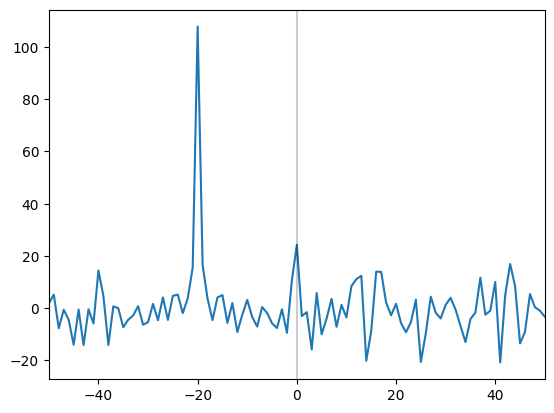

In [25]:
plt.plot(lags, corr)
plt.axvline(0, ls='-', c='k', alpha=0.2)
plt.xlim(-50, 50)
plt.show()

In [2]:
from constants import CONV_TRS, RUNS, TR, SUBS_STRANGERS
from sklearn.model_selection import KFold, PredefinedSplit

In [31]:
trial_ids = np.repeat(np.arange(1, 11), 120)
run_ids = np.repeat(np.arange(1, 6), 240)
CONV_TRS, RUNS, run_ids.shape, run_ids

(120, (1, 2, 3, 4, 5), (1200,), array([1, 1, 1, ..., 5, 5, 5]))

In [38]:
from sklearn.model_selection import LeavePGroupsOut

In [49]:
kfold = PredefinedSplit(trial_ids)
kfold = LeavePGroupsOut(n_groups=1)
kfold = PredefinedSplit(run_ids)

In [50]:
for i, (train_idx, test_idx) in enumerate(kfold.split(run_ids, groups=run_ids)):
    print(i, 'train:', train_idx[0], train_idx[-1], 'test:', test_idx[0], test_idx[-1])

0 train: 240 1199 test: 0 239
1 train: 0 1199 test: 240 479
2 train: 0 1199 test: 480 719
3 train: 0 1199 test: 720 959
4 train: 0 959 test: 960 1199


In [48]:
for i, (train_idx, test_idx) in enumerate(kfold.split(run_ids, groups=run_ids)):
    print(i, 'train:', train_idx[0], train_idx[-1], 'test:', test_idx[0], test_idx[-1])

0 train: 240 1199 test: 0 239
1 train: 0 1199 test: 240 479
2 train: 0 1199 test: 480 719
3 train: 0 1199 test: 720 959
4 train: 0 959 test: 960 1199


In [4]:
%cd ..

/scratch/gpfs/zzada/fconv


In [2]:
from util import subject

In [8]:
sub_id = 105
condition = 'G'
dft = subject.get_timing(sub_id, condition=condition)
dft2 = dft[["run", "trial", "condition"]].drop_duplicates().dropna()
dft2["trial"] = dft2.trial.astype(int)
rt_dict = dft2[["run", "trial"]].groupby("run")["trial"].apply(list).to_dict()

In [9]:
dft2

,run,trial,condition
2,1,1,G
28,1,4,G
38,2,1,G
58,2,3,G
78,3,2,G
91,3,4,G
103,4,2,G
117,4,4,G
132,5,2,G
147,5,4,G


In [10]:
rt_dict

{1: [1, 4], 2: [1, 3], 3: [2, 4], 4: [2, 4], 5: [2, 4]}

In [6]:
subject.get_trials(5, condition='G')

{1: [1, 4], 2: [1, 3], 3: [2, 4], 4: [2, 4], 5: [2, 4]}

In [6]:
%cd ..

/scratch/gpfs/zzada/fconv


In [35]:
path = Path(root='data/derivatives/fmriprep', sub='004', ses=1, datatype='func', task='Black', run=1, space='T1w', desc='brain_mask', ext='.nii.gz')
path

data/derivatives/fmriprep/sub-004/ses-1/func/sub-004_ses-1_task-Black_run-1_space-T1w_desc-brain_mask.nii.gz

In [36]:
img = nib.load(path)
mask = img.get_fdata().astype(bool)
mask.shape

(48, 59, 49)

In [28]:
path = Path(root='data/derivatives/fmriprep', sub='004', ses=1, datatype='func', task='Black', run=1, space='T1w', desc='preproc_bold', ext='.nii.gz')
path

data/derivatives/fmriprep/sub-004/ses-1/func/sub-004_ses-1_task-Black_run-1_space-T1w_desc-preproc_bold.nii.gz

In [29]:
img = nib.load(path)
data = img.get_fdata()
data.shape

(48, 59, 49, 550)

In [39]:
data[mask, ...].shape

(61997, 550)